In [1]:
import pandas as pd
import numpy as np

### 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [2]:
df_patient = pd.read_csv('emp_health.csv') # reading data set

df_patient.head() # printing first five rows

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [3]:
smokers = df_patient[(df_patient['age'] > 50) & (df_patient['smoke'] == 'yes')] # filtering  a data set

print('No. of employee above age 50 smoke: ',len(smokers.values)) # printing the number of employees age 50 who smoke

No. of employee above age 50 smoke:  64


In [4]:
print('Average expenditure on health management for employee age above 50 and smokes :',round(smokers['expenditure'].mean(),2)) # printing avg expenditure

Average expenditure on health management for employee age above 50 and smokes : 38820.22


 ### 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [5]:
female_non_drinker_daily = df_patient[(df_patient['sex'] == 'female') & (df_patient['alcohol'] != 'daily')] # non daily alcohol drinker female

tot_fem_nondrinker_daily = len(female_non_drinker_daily.values) # get the number of female employees

print('No. of female employees did not consume alcohol daily: ',tot_fem_nondrinker_daily) # print the result

No. of female employees did not consume alcohol daily:  453


In [6]:
female_emp = df_patient[df_patient['sex'] == 'female'] # get the female employees

tot_fem_emp = len(female_emp) # get the total number

proportion = round(tot_fem_nondrinker_daily * 100/ tot_fem_emp, 2) # find the proportion to total emp

print(f'Proportion with respect to total female employees {proportion}%') # print the result



Proportion with respect to total female employees 68.43%


 ### 3. Display zone wise average expenditure of employees on health

In [7]:
df_patient.groupby('zone')['expenditure'].mean().to_frame() # zone wise average expenditure

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


 ### 4. Employees of which zone did maximum expenditure on health

In [8]:
df_patient.groupby('zone')['expenditure'].sum().sort_values(ascending = False).head(1) # east have maximum expenditure on health

zone
east    3.608966e+06
Name: expenditure, dtype: float64

East zone did a maximum expenditure on health

### 5. What is the minimum expenditure done by any employee in organization

In [9]:
df_min_expenditure = df_patient.sort_values(by = 'expenditure', axis = 0, ascending = True).head(1) # get the first row in ascending order
df_min_expenditure # display the output

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


In [10]:
df_min_expenditure[['expenditure']]

,expenditure
940,1121.8739


The minimum expenditure done by any employee in organisation is 'Rs.1121.87'.

 ### 6. What is average expenditure of employees who have 2 or lesser dependents

In [11]:
df_dependent_below2 = df_patient[df_patient['dependent'] <= 2]

df_dependent_below2['expenditure'].mean() #  average expenditure of employees who have 2 or lesser dependents

13040.970970948145

 ### 7. How many employees are below age of 20 years. What is their average BMI

In [12]:
len(df_patient[df_patient['age'] < 20].values) # no. of employees below age 20

137

In [13]:
df_patient[df_patient['age'] < 20]['bmi'].mean() # their avg BMI

29.971496350364966

### 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [14]:
non_smoker = df_patient[(df_patient['sex'] == 'male') & (df_patient['smoke'] == 'no')] # dataframe non smoker males

non_smoker.head() # display first 5 rows

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070


###  9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [15]:
non_alcoholic = df_patient[(df_patient['sex'] == 'male') & (df_patient['alcohol'] == 'no')] # data frame for all non alcoholic males

non_alcoholic.head() # display first 5 rows

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


### 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [16]:
non_smoking_alcoholic = pd.merge(non_alcoholic,non_smoker) # dataframe of non smoking non alcoholic males

non_smoking_alcoholic[['id','smoke','alcohol']] # display id,smoke, alcohol as columns


,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


### 11.What is the count for each zone with respect to number of dependent

In [17]:
pd.crosstab(df_patient.zone, df_patient.dependent, rownames= ['zone'], colnames= ['No.dependent']) #  count for each zone with respect to number of dependent

No.dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


### 12. Classify the employees into 3 categories

In [18]:
df_patient[df_patient['bmi'] < 18.5]['id'].count() # 20  underweight employees


20

In [19]:
emp_underweight_exp = df_patient[df_patient['bmi'] < 18.5]['expenditure'].mean() # avg expenditure for underweight people
emp_underweight_exp



8852.200585000002

In [20]:
df_patient[df_patient['bmi']>25]['id'].count() # overweight people in organisation

1091

In [21]:
emp_overweight_exp = df_patient[df_patient['bmi']>24.9]['expenditure'].mean() # avg expenditure for overweight people
emp_overweight_exp

13936.616823466235

In [22]:
df_patient[(df_patient['bmi']>=18.5) & (df_patient['bmi']<=24.9)]['id'].count() # no.of fit people in organisation


222

In [23]:
emp_fit_exp = df_patient[(df_patient['bmi']>=18.5) & (df_patient['bmi']<=24.9)]['expenditure'].mean() # avg expenditure for fit peoples

emp_fit_exp # display the output

10379.499732162163

In [24]:
bmi_list = ['UnderWeight', 'Fit','OverWeight'] # create a bmi list

exp_list = [emp_underweight_exp,emp_fit_exp,emp_overweight_exp] # expenditure list

emp_avg_exp = pd.DataFrame(list(zip(bmi_list,exp_list)), columns = ['BMI-Category', 'Average_Expenditure']) # create a data frame

emp_avg_exp # display the dataframe

,BMI-Category,Average_Expenditure
0,UnderWeight,8852.200585
1,Fit,10379.499732
2,OverWeight,13936.616823


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='BMI-Category', ylabel='Average_Expenditure'>

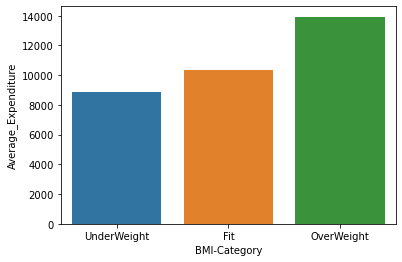

In [26]:
sns.barplot(x = 'BMI-Category', y = 'Average_Expenditure', data = emp_avg_exp) # display the bar plot

### 13. Draw line plot of expenditure against age and BMI

<AxesSubplot:xlabel='age', ylabel='expenditure'>

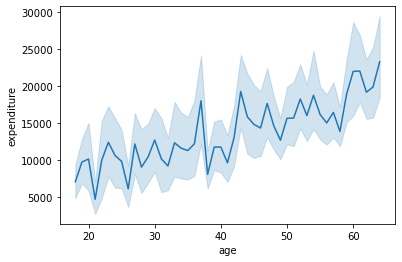

In [27]:
sns.lineplot(x = 'age', y = 'expenditure', data = df_patient) # display the line plot

<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

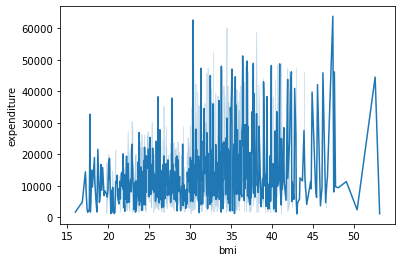

In [28]:
sns.lineplot(x = 'bmi', y = 'expenditure', data = df_patient ) # display the line plot

###  14. Draw a bar chart to show zone wise average expenditure

<AxesSubplot:xlabel='zone', ylabel='expenditure'>

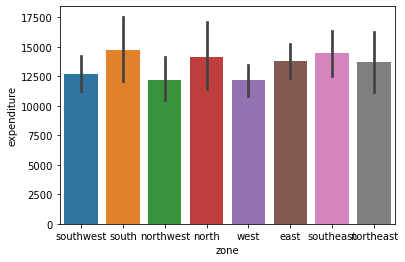

In [29]:
sns.barplot(x = 'zone', y = 'expenditure', data = df_patient) # display the bar plot

###  15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

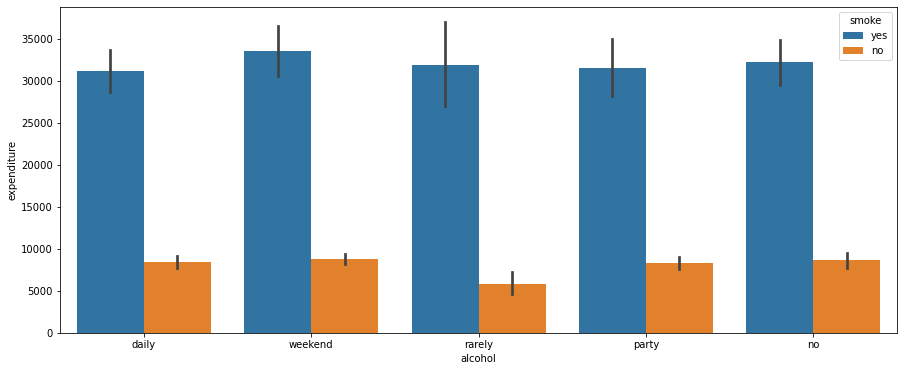

In [30]:
plt.figure(figsize=(15,6)) # set figure size
sns.barplot(x = 'alcohol', y = 'expenditure', hue = 'smoke', data = df_patient) # display the bar plot

### 16. Draw pie chart for alcohol consumption habits

In [36]:
import plotly.express as px # importing plotly

In [31]:
alcohol_cons = df_patient.groupby('alcohol')['id'].count() # get count of alcoholic employees

alcohol_cons # display the dataframe

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

In [35]:
alcohol_cons.reset_index() # reset the index
alcohol_cons = alcohol_cons.rename(columns = {'id': 'count'}) # rename the column id to count
alcohol_cons # display the dataframe

,alcohol,count
0,daily,395
1,no,259
2,party,278
3,rarely,59
4,weekend,347


In [42]:
px.pie(data_frame = alcohol_cons, values = 'count', names = 'alcohol') # display the pie plot

### 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

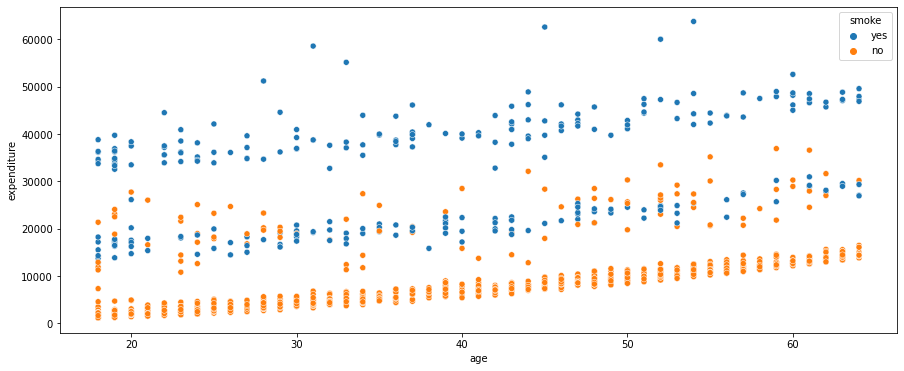

In [45]:
plt.figure(figsize=(15,6)) # set figure size
sns.scatterplot(x = 'age', y = 'expenditure', hue = 'smoke', data = df_patient) # plotting scatter plot

plt.show() # display the plot

### 18. Draw distribution plot of expenditure

C:\Users\xchri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='expenditure', ylabel='Density'>

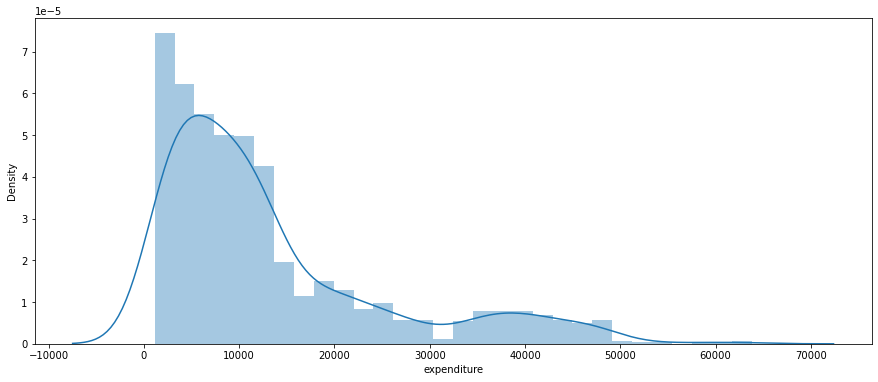

In [53]:
plt.figure(figsize=(15,6)) # set plot size

sns.distplot(df_patient['expenditure']) # plotting distribution plot

###  19. Display the pairplot

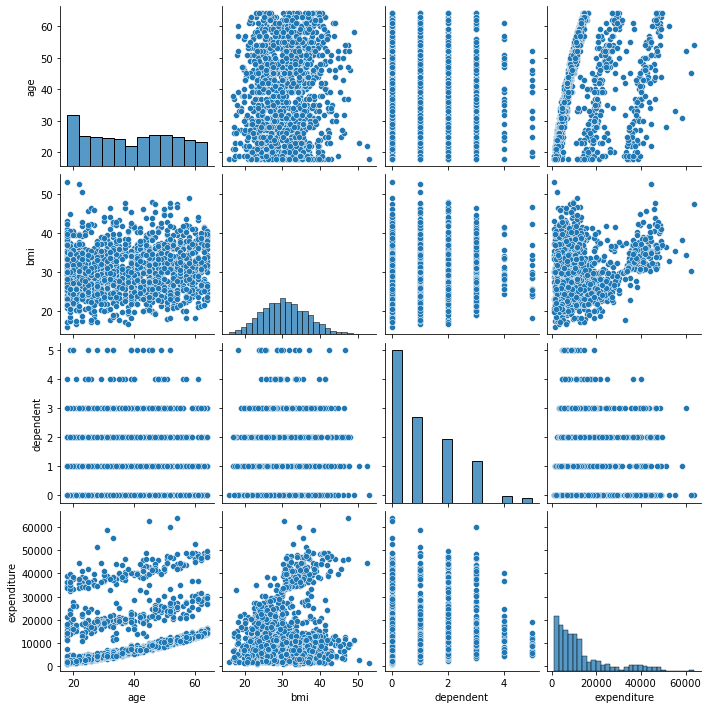

In [55]:
sns.pairplot(df_patient) # plotting pairplot

### 20. Display heatmap for the data

<AxesSubplot:>

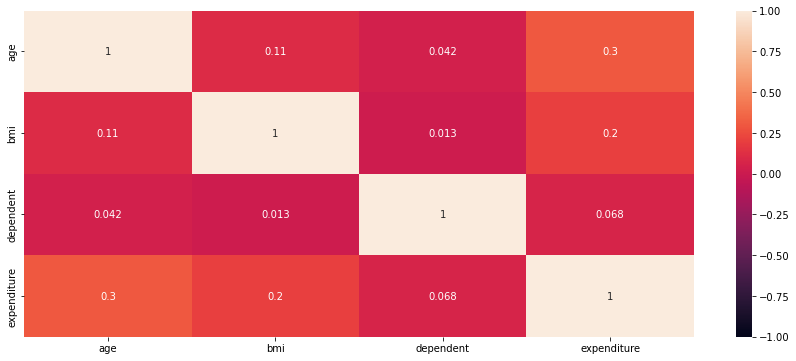

In [63]:
plt.figure(figsize=(15,6)) # set figure size

sns.heatmap(df_patient.corr(), annot = True, vmin = -1) # plot heat map